<a href="https://colab.research.google.com/github/bmurmann/skywater-pdk-sky130-raw-data/blob/main/sky130_gm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 plots of ID-VG derivatives


Boris Murmann, August 2022<br>
Based on:
[sky130-raw-data-viz.ipynb](https://colab.research.google.com/github/proppy/skywater-pdk-sky130-raw-data/blob/notebooks/notebooks/sky130-raw-data-viz.ipynb)


## Get data

In [ ]:
!git clone https://github.com/google/skywater-pdk-sky130-raw-data

Cloning into 'skywater-pdk-sky130-raw-data'...
remote: Enumerating objects: 1028, done.
remote: Counting objects: 100% (1028/1028), done.
remote: Compressing objects: 100% (1021/1021), done.
remote: Total 1028 (delta 9), reused 1023 (delta 6), pack-reused 0
Receiving objects: 100% (1028/1028), 10.29 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Install DeviceModelingToolkit

[DeviceModelingToolkit](https://dmt-development.gitlab.io/dmt-core/index.html) (DMT) is a Python tool targeted at helping modeling engineers extract model parameters, run circuit and TCAD simulations and automate their infrastructure.


In [ ]:
!python3 -m pip install DMT-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 236 kB 4.3 MB/s 
     |████████████████████████████████| 22.0 MB 4.8 MB/s 
     |████████████████████████████████| 30.9 MB 1.2 MB/s 
     |████████████████████████████████| 209 kB 41.5 MB/s 
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=0c09419ea52e2b0cd56c30bc440a898d7e5563342edbde61f44b77cf5996fecf
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
  Created wheel for scikit-rf: filename=scikit_rf-0.23.1-py3-none-any.whl size=3408203 sha256=f21b8f6c228ee86727a3d0df993271220f96e962deca4c23a9077a6e139a40c0
  Stored in directory: /root/.cache/pip/wheels/25/e7/c7/9b465c754ec65d763f881bc4272b62e17375538f03c027882d
Successfully built colormath scikit-rf


## Read measurement data

In [ ]:
import pathlib
import pandas as pd
import DMT.core
import numpy as np
import matplotlib.pyplot as plt

cells_dir = pathlib.Path('skywater-pdk-sky130-raw-data/sky130_fd_pr/cells')

# 5V device
#cell_dir = cells_dir / 'nfet_g5v0d10v5'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_g5v0d10v5_w0p420u_l0p500u_m1(2618_1_10_IDVD_D3).mdm'

# 1.8V device, regular Vt, long channel
#cell_dir = cells_dir / 'nfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w7u_l8u_m1(8392_5_6_IDVG).mdm'

# 1.8V device, regular Vt, short channel
cell_dir = cells_dir / 'nfet_01v8'
mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_6_7_IDVG).mdm'

measurement = DMT.core.DutMeas(
    database_dir=None,
    dut_type=DMT.core.DutType.device,
    name=mdm_path.stem,
    reference_node='E')

measurement.add_data(pathlib.Path(mdm_path),
                     key=mdm_path.stem)
df = measurement.data[mdm_path.stem]
df = df[np.isclose(df["VD"], 1.8)]
df = df[np.isclose(df["VB"], 0)]
df

DMT->Plot: Failed to import plotting module pyqtgraph.
-----------------------------------------------------------------------
DMT Copyright (C) 2022 SemiMod
This program comes with ABSOLUTELY NO WARRANTY.
DMT_core is free software, and you are welcome to redistribute it.
-----------------------------------------------------------------------


,VG,IG,ID,IB,VS,VB,VD
37,0.00,1.362800e-09,1.426900e-09,-1.215200e-08,0.0,0.0,1.8
38,0.05,1.081400e-09,2.290300e-09,-8.773000e-09,0.0,0.0,1.8
39,0.10,1.227300e-09,2.128200e-09,1.097400e-08,0.0,0.0,1.8
40,0.15,-1.394500e-09,1.156100e-09,2.806300e-08,0.0,0.0,1.8
41,0.20,-1.171700e-09,-2.132000e-09,1.125000e-08,0.0,0.0,1.8
42,0.25,1.426000e-09,-1.087000e-09,-2.662100e-08,0.0,0.0,1.8
43,0.30,9.785000e-10,2.435100e-09,-8.399000e-09,0.0,0.0,1.8
44,0.35,-1.502700e-09,1.357500e-09,2.671100e-08,0.0,0.0,1.8
45,0.40,-1.421000e-09,1.528200e-09,8.179000e-09,0.0,0.0,1.8
46,0.45,-1.387000e-09,8.153400e-09,1.022800e-08,0.0,0.0,1.8


# Compute quantities of interest

In [ ]:
# simple equations for derivatives; can put in more work to use forward/backward at the edge, central in the middle
dx = 50e-3;
df['GM1'] = df['ID'].diff(1)/dx
df['GM2'] = (df['ID'] - 2*df['ID'].shift(1) + df['ID'].shift(2))/dx**2
df['GM3'] = (df['ID'] - 3*df['ID'].shift(1) + 3*df['ID'].shift(2) - df['ID'].shift(3))/dx**3
df['GM1_ID'] = df['GM1']/df['ID']
df

,VG,IG,ID,IB,VS,VB,VD,GM1,GM2,GM3,GM1_ID
37,0.00,1.362800e-09,1.426900e-09,-1.215200e-08,0.0,0.0,1.8,NaN,NaN,NaN,NaN
38,0.05,1.081400e-09,2.290300e-09,-8.773000e-09,0.0,0.0,1.8,1.726800e-08,NaN,NaN,7.539624
39,0.10,1.227300e-09,2.128200e-09,1.097400e-08,0.0,0.0,1.8,-3.242000e-09,-4.102000e-07,NaN,-1.523353
40,0.15,-1.394500e-09,1.156100e-09,2.806300e-08,0.0,0.0,1.8,-1.944200e-08,-3.240000e-07,0.000002,-16.816884
41,0.20,-1.171700e-09,-2.132000e-09,1.125000e-08,0.0,0.0,1.8,-6.576200e-08,-9.264000e-07,-0.000012,30.845216
42,0.25,1.426000e-09,-1.087000e-09,-2.662100e-08,0.0,0.0,1.8,2.090000e-08,1.733240e-06,0.000053,-19.227231
43,0.30,9.785000e-10,2.435100e-09,-8.399000e-09,0.0,0.0,1.8,7.044200e-08,9.908400e-07,-0.000015,28.927765
44,0.35,-1.502700e-09,1.357500e-09,2.671100e-08,0.0,0.0,1.8,-2.155200e-08,-1.839880e-06,-0.000057,-15.876243
45,0.40,-1.421000e-09,1.528200e-09,8.179000e-09,0.0,0.0,1.8,3.414000e-09,4.993200e-07,0.000047,2.234001
46,0.45,-1.387000e-09,8.153400e-09,1.022800e-08,0.0,0.0,1.8,1.325040e-07,2.581800e-06,0.000042,16.251380


# Plots

**comments:** 
*   From the log plot, we see that the data gets noisy below 2nA.


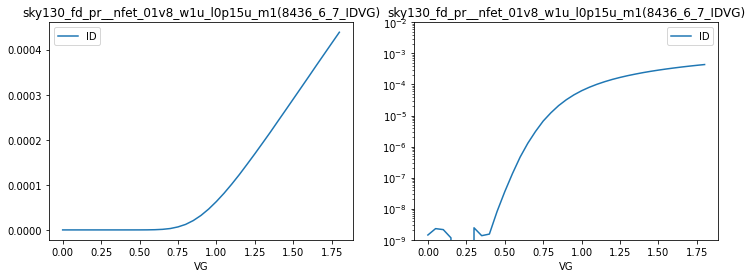

In [ ]:
# plot ID-VG on linear and log scales
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="ID", ax=axes[0], logy=False, title = mdm_path.stem)
df.plot(x="VG", y="ID", ax=axes[1], logy=True, title = mdm_path.stem)
plt.show()

**comments:** 

*   gm looks OK, showing velocity saturation. But, not sure why there are kinks above ~1.2V
*   Not surprisingly, gm/ID looks bad below VG ~ 0.5V (or gm/ID ~ 15 S/A) due to the noise in ID
*   This means the data cannot be used to predict the subthreshold slope (digital leakage) or peak gm/ID (for low power analog)

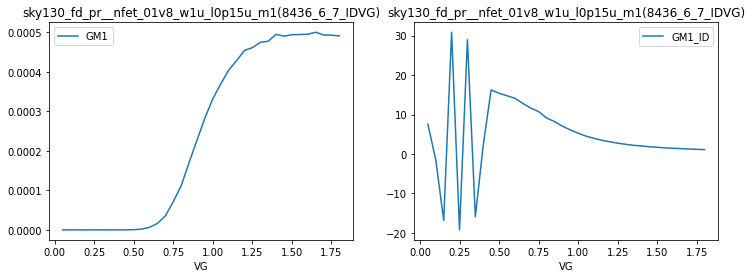

In [ ]:
# plot gm and gm/ID
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="GM1", ax=axes[0], title = mdm_path.stem)
df.plot(x="VG", y="GM1_ID", ax=axes[1], title = mdm_path.stem)
plt.show()

**comments:**
*   Looks noisy, but curve fitting & filtering may help here
*   If we squint a little bit, we can see the expected zero crossing in GM3; a sweet spot for low-distortion design 

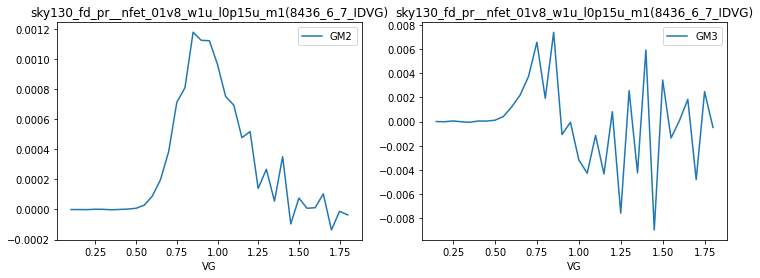

In [ ]:
# plot high-order derivatives (for distortion modeling)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="GM2", ax=axes[0], title = mdm_path.stem)
df.plot(x="VG", y="GM3", ax=axes[1], title = mdm_path.stem)
plt.show()

For comparison, refer to [data](https://www.mos-ak.org/munich_2007/papers/02_MOS-AK_Assenmacher.pdf) collected by Infineon for PSP modeling. Key points:

*   Their ID looks noise free down to several tens of pA, see p. 12 (instead of 2nA)
*   The derivatives computed from measurements look cleaner, see p. 13 (though I don't know how exactly how they were computed)
*   Their VG step size is also 50mV, so should be OK for us as well




